In [2]:
# 统计某个量的数量，并生成图表
# 请用py310内核运行，运行时长16min
import os
import json
from matplotlib import pyplot
import copy

In [3]:
def countkeyofdata(keyname, filename):

    numberdict={}
    with open(filename, 'r') as pr:
        datas=json.load(pr)
        for data in datas:
            if keyname not in data.keys():
                continue
            if str(data[keyname]) not in numberdict.keys():
                numberdict.setdefault(str(data[keyname]),1)
            else:
                numberdict[str(data[keyname])]+=1
    return numberdict



def count_nidvalue_onefile(filename, slt=True):
    numberdict={}
    with open(filename, 'r') as pr:
        datas=json.load(pr)
        for data in datas:
            if slt:
                if eval(data["INVOL"]) not in eval(data["invol_sr_li_tr"]):
                    continue
            if "OPLANES" not in data.keys():
                continue
            if "value" not in data["OPLANES"].keys():
                continue
            if not data["OPLANES"]["tadpole_cancel"]:
                continue
            if str(data["OPLANES"]["value"]) not in numberdict.keys():
                numberdict.setdefault(str(data["OPLANES"]["value"]),1)
            else:
                numberdict[str(data["OPLANES"]["value"])]+=1
    return numberdict




def count_refvalue_onefile(filename):

    numberdict={}
    with open(filename, 'r') as pr:
        datas=json.load(pr)
        for data in datas:
            for key in ["invol1", "invol3"]:
                if key not in data.keys():
                    continue
                for datakeyvalue in data[key]:
                    if "satisfied" not in datakeyvalue or "No Oplane" in datakeyvalue:
                        continue
                    try:
                        value=datakeyvalue.split("satisfied ")[1].split(";")[0]
                    except:
                        print(datakeyvalue)
                        datakeyvalue.split("satisfied ")[1].split(";")[0]
                    if value not in numberdict.keys():
                        numberdict.setdefault(value,1)
                    else:
                        numberdict[value]+=1
    return numberdict








def count_value_manyfilepath(filepath, nid):
    numberdict={}
    filenames=os.listdir(filepath)
    for filename in filenames:
        if "json" not in filename:
            numberdictonefile=count_value_manyfilepath(filepath+filename+"/", nid)
        else:
            if nid:
                numberdictonefile=count_nidvalue_onefile(filepath+filename)
            else:
                numberdictonefile=count_refvalue_onefile(filepath+filename)

        numberdictkeys=numberdict.keys()
        for numberdictonefilekey in numberdictonefile.keys():
            if numberdictonefilekey not in numberdictkeys:
                numberdict.setdefault(numberdictonefilekey, numberdictonefile[numberdictonefilekey])
            else:
                numberdict[numberdictonefilekey]+=numberdictonefile[numberdictonefilekey]
    return numberdict

In [4]:
numberdict27nid=count_value_manyfilepath("/mnt/disk1/xingao/gaohongfei/project_new/newCYdatabase/1<h11<=7/NID/", True)
numberdict812nid=count_value_manyfilepath("/mnt/disk1/xingao/gaohongfei/project_new/newCYdatabase/8<=h11<=12/NID/", True)
numberdictnid=copy.deepcopy(numberdict27nid)

numberdictkeys=numberdictnid.keys()
for numberdictonefilekey in numberdict812nid.keys():
    if numberdictonefilekey not in numberdictkeys:
        numberdictnid.setdefault(numberdictonefilekey, numberdict812nid[numberdictonefilekey])
    else:
        numberdictnid[numberdictonefilekey]+=numberdict812nid[numberdictonefilekey]


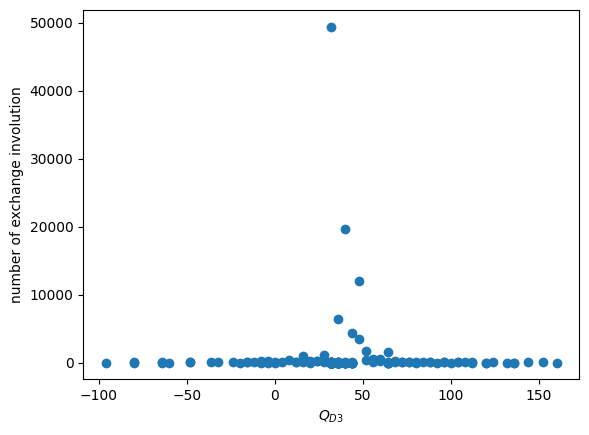

d3最大值： 160.0 
d3最小值： -96.0


In [8]:
# 示例字典数据


# 提取字典的键和值
x = [float(x) for x in list(numberdict27nid.keys())]
y = list(numberdict27nid.values())

# 绘制散点图
pyplot.scatter(x, y)

# 添加标题和标签
#pyplot.title("$2 \leq h^{(1,1)} \leq 7$ and $8 \leq h^{(1,1)} \leq 12$")
pyplot.xlabel("$Q_{D3}$")
pyplot.ylabel("number of exchange involution")

# 显示图形
pyplot.show()
x.sort()
print("d3最大值：", x[-1], "\nd3最小值：", x[0])

In [6]:
numberdict27ref=count_value_manyfilepath("/mnt/disk1/xingao/gaohongfei/project_new/newCYdatabase/1<h11<=7/REF/", False)

numberdict812ref=count_value_manyfilepath("/mnt/disk1/xingao/gaohongfei/project_new/newCYdatabase/8<=h11<=12/REF/", False)
numberdictref=copy.deepcopy(numberdict27ref)

numberdictkeys=numberdictref.keys()
for numberdictonefilekey in numberdict812ref.keys():
    if numberdictonefilekey not in numberdictkeys:
        numberdictref.setdefault(numberdictonefilekey, numberdict812ref[numberdictonefilekey])
    else:
        numberdictref[numberdictonefilekey]+=numberdict812ref[numberdictonefilekey]

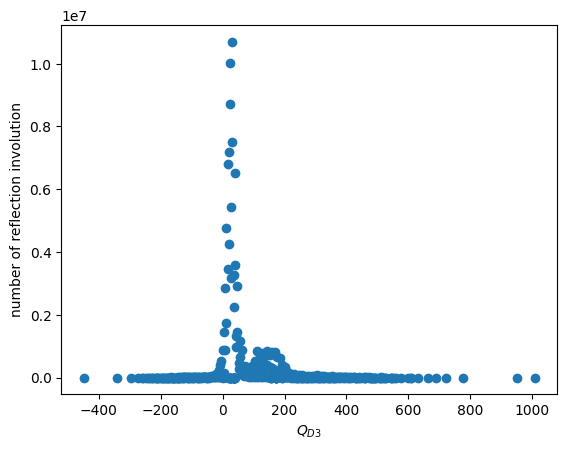

d3最大值： 1008.0 
d3最小值： -448.0


In [9]:
# 提取字典的键和值
x = [float(x) for x in list(numberdictref.keys())]
y = list(numberdictref.values())




# 绘制散点图
pyplot.scatter(x, y)

# 添加标题和标签
pyplot.xlabel("$Q_{D3}$")
pyplot.ylabel("number of reflection involution")

# 显示图形
pyplot.show()

x.sort()

print("d3最大值：", x[-1], "\nd3最小值：", x[0])

In [10]:
with open("../result/d3value.json", 'w') as pout:
    json.dump([numberdictnid, numberdictref], pout, indent=2)